## 1. Read Data & Quick Overview

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.style.use('seaborn-notebook')

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/EverUp Data Analytics/heart_Disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 2. Data Exploration

In [5]:
# see data distribution
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


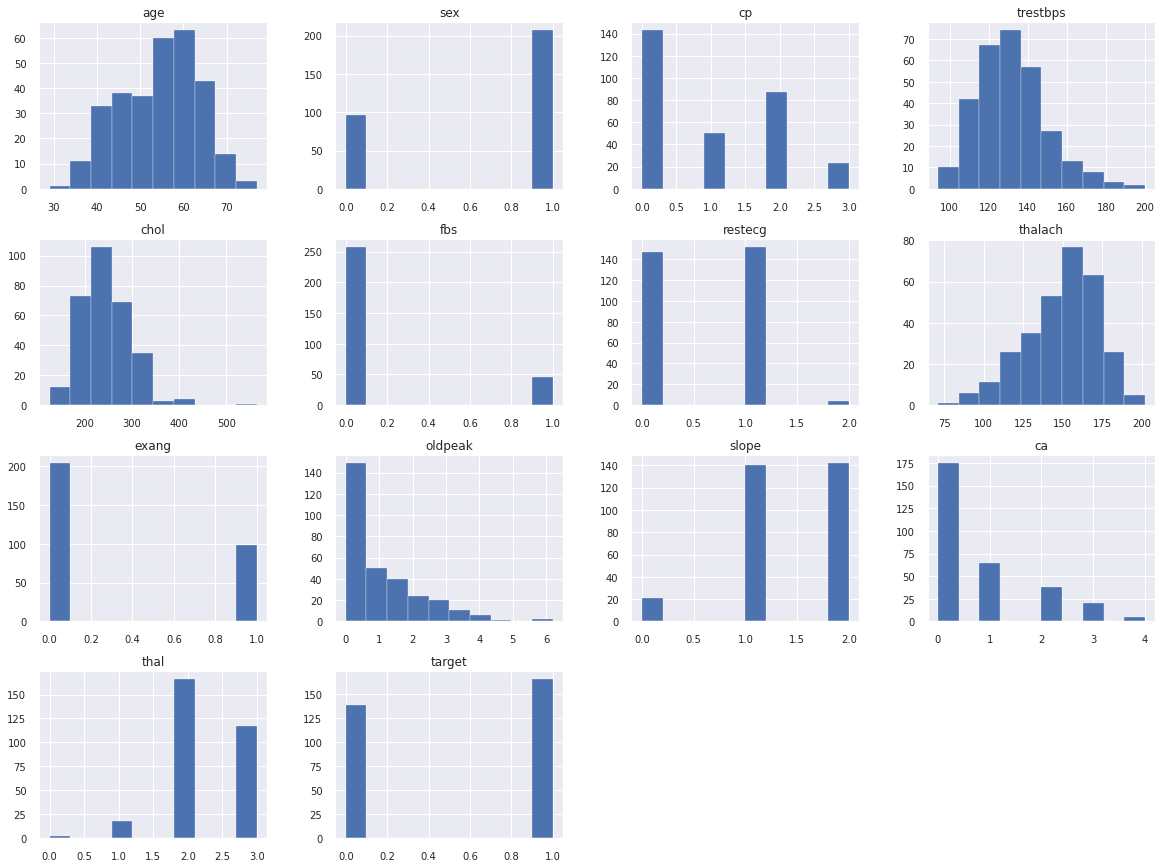

In [6]:
# see data distribution
df.hist(figsize=(20,15))
plt.show()

In [7]:
def bar_chart(feature):
    yes = df[df['target']==1][feature].value_counts()
    no = df[df['target']==0][feature].value_counts()
    df_ = pd.DataFrame([yes,no])
    df_.index = ['Yes-HeartDisease',"No-HeartDisease"]
    df_.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.xticks(rotation=0)

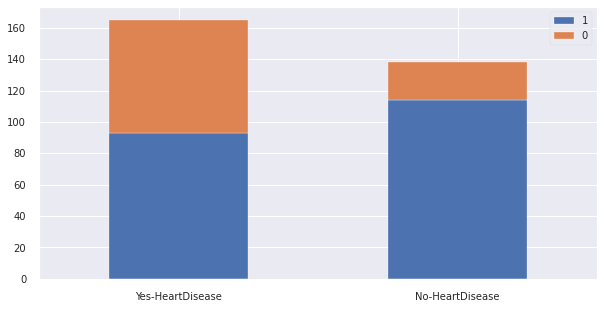

In [8]:
# disease result by sex
bar_chart("sex")

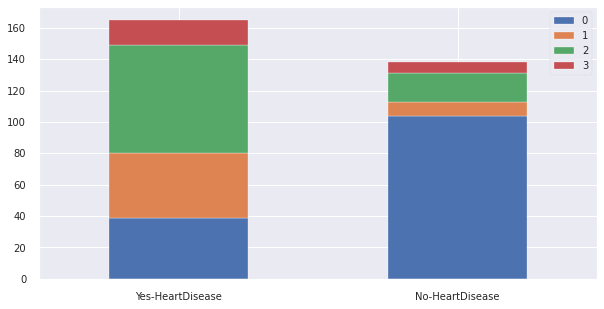

In [9]:
# disease result by chest pain level
bar_chart("cp")

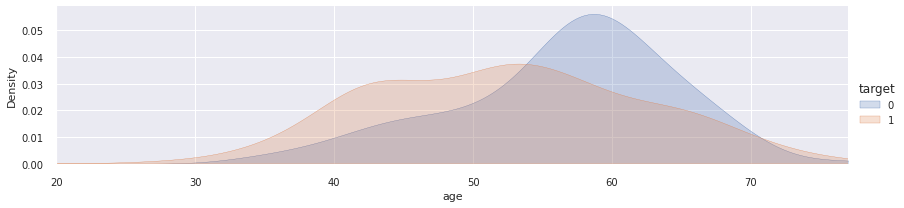

In [10]:
# show age distrubution by disease result
facet = sns.FacetGrid(df, hue="target",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(20, df['age'].max()))
facet.add_legend() 
plt.show()

## 3. ML Model

In [11]:
import datetime
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
transfer=StandardScaler()

In [12]:
def model_selection(df):
    
    Algorithm = []
    Accuracy = []
    Time = []
    
    x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=35)
    
    # try linear regression 
    Algorithm.append('Linear Regression')
    
    start_time = datetime.datetime.now()
    
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    
    linear_accuracy = f"{np.round(100*linear_model.score(x_test, y_test),2)}%"
    Accuracy.append(linear_accuracy)
    
    end_time = datetime.datetime.now()
    linear_cal_time = (end_time-start_time).seconds
    Time.append(linear_cal_time)
    
    # try ElasticNet
    Algorithm.append('ElasticNet')
    
    start_time = datetime.datetime.now()
    
    enet = ElasticNet()
    enet.fit(x_train, y_train)
    
    enet_accuracy = f"{np.round(100*enet.score(x_test, y_test),2)}%"
    Accuracy.append(enet_accuracy)
    
    end_time = datetime.datetime.now()
    enet_cal_time = (end_time-start_time).seconds
    Time.append(enet_cal_time)

    # try SVR
    for i in ["linear","poly","rbf"]:
        Algorithm.append(f'SVR-{i}')

        start_time = datetime.datetime.now()

        svr = SVR(kernel=i) 
        svr.fit(x_train, y_train)

        svr_accuracy = f"{np.round(100*svr.score(x_test, y_test),2)}%"
        Accuracy.append(svr_accuracy)

        end_time = datetime.datetime.now()
        svr_cal_time = (end_time-start_time).seconds
        Time.append(svr_cal_time)

    # try Gradient Boosting Regressor
    Algorithm.append('Gradient Boosting Regressor')
    
    start_time = datetime.datetime.now()
    
    clf = ensemble.GradientBoostingRegressor()
    clf.fit(x_train, y_train)
    
    clf_accuracy = f"{np.round(100*clf.score(x_test, y_test),2)}%"
    Accuracy.append(clf_accuracy)
    
    end_time = datetime.datetime.now()
    clf_cal_time = (end_time-start_time).seconds
    Time.append(clf_cal_time)
    
    # show test result
    test_result = pd.DataFrame({"Algorithm":Algorithm,"Time(Seconds)": Time,"Test Set Accuracy":Accuracy})
    
    return(test_result)

In [13]:
# benchmark model performance
model_selection(df)

,Algorithm,Time(Seconds),Test Set Accuracy
0,Linear Regression,0,50.39%
1,ElasticNet,0,15.16%
2,SVR-linear,5,53.82%
3,SVR-poly,0,4.04%
4,SVR-rbf,0,7.99%
5,Gradient Boosting Regressor,0,44.35%


## 4. ML Models - Resampled & SMOTE

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df.target, test_size = 100)

In [15]:
from sklearn.utils import resample

In [16]:
X_res, y_res = resample(X_train, y_train, n_samples = 1000, random_state = 42)

In [17]:
from collections import Counter

In [18]:
Counter(y_res)

Counter({0: 424, 1: 576})

In [19]:
X_positive = X_res[y_res == 1]
X_positive

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2


In [20]:
X_negative = X_res[y_res == 0]
X_negative

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1


In [21]:
X_positive.loc[:,'target'] = 1
X_negative.loc[:,'target'] = 0

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X_for_pos = X_positive.append(X_train[y_train == 0])
X_for_pos.target = X_for_pos.target.fillna(0)
X_for_pos

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1.0
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1.0
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1.0
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1.0
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0.0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0.0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0.0
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0.0


In [24]:
X_for_neg = X_negative.append(X_train[y_train == 1])
X_for_neg.target = X_for_neg.target.fillna(1)
X_for_neg

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0.0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0.0
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0.0
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0.0
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1.0
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1.0
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1.0


In [25]:
Counter(X_for_pos.target)

Counter({0.0: 89, 1.0: 576})

In [26]:
Counter(X_for_neg.target)

Counter({0.0: 424, 1.0: 114})

In [27]:
smote_pos = SMOTE(random_state = 42)

In [28]:
X_pos_res, y_pos_res = smote_pos.fit_resample(X_for_pos.drop('target', axis = 1), X_for_pos.target)

In [29]:
smote_neg = SMOTE(random_state = 42)

In [30]:
X_neg_res, y_neg_res = smote_neg.fit_resample(X_for_neg.drop('target', axis = 1), X_for_neg.target)

In [31]:
Counter(y_neg_res)

Counter({0.0: 424, 1.0: 424})

In [32]:
Counter(y_pos_res)

Counter({0.0: 576, 1.0: 576})

In [33]:
X_pos_res['target'] = y_pos_res
X_neg_res['target'] = y_neg_res

In [34]:
df_train = X_pos_res.append(X_neg_res)

In [35]:
Counter(df_train.target)

Counter({0.0: 1000, 1.0: 1000})

In [36]:
X_train = df_train.drop('target', axis = 1)
y_train = df_train.target

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
tree.score(X_test, y_test)

0.77

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
params = {'max_depth' : [None,4, 10, 15, 20, 25,30,35,40,45,50],\
         'min_samples_leaf' : [1, 3, 4, 6, 8, 10, 12,15,18, 20, 25],\
         'max_leaf_nodes' : [None, 2, 4, 6, 8, 10, 12, 15],\
          'max_features' : [None, 'auto', 'log2', 'sqrt'],\
         }

In [42]:
clf = GridSearchCV(tree, params)

In [43]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 4, 10, 15, 20, 25, 30, 35, 40, 45,
                                       50],
                         'max_features': [None, 'auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None, 2, 4, 6, 8, 10, 12, 15],
                         'min_samples_leaf': [1, 3, 4, 6, 8, 10, 12, 15, 18, 20,
                                              25]})

In [44]:
clf.best_score_

0.9675

In [45]:
clf.best_params_

{'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1}

In [46]:
best_tree = clf.best_estimator_

In [47]:
best_tree.score(X_train, y_train)

1.0

In [48]:
# improved model performance
best_tree.score(X_test, y_test)

0.77

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [50]:
y_pred = best_tree.predict(X_test)

In [ ]:
print('roc_auc: ', roc_auc_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))

roc_auc:  0.7084863321093431
precision:  0.6521739130434783
recall:  0.6976744186046512
f1:  0.6741573033707865
